 #                      Supermarket Sales Data Analysis.

### A supermarket is self-service shop offering a wide variety of food, beverages and household products, organized into sections. It is larger and has a wider selection than earlier grocery stores, but is smaller and more limited in the range of merchandise than a hypermarket or big-box market.

1.Relation of customers with SuperMarket

2.Payment methods used in supermarket.

3.Products relation with quantities.

4.Types of product and their sales.

5.Products and their ratings.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Reading Dataset

In [2]:
df=pd.read_csv("C:\\Users\\ad\\Downloads\\supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Step 1: checking the basic information
### Checking the shape

In [3]:
df.shape

(1000, 17)

### How does the data look?

In [4]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
873,166-19-2553,A,Yangon,Member,Male,Sports and travel,89.06,6,26.7180,561.0780,1/18/2019,17:26,Cash,534.36,4.761905,26.7180,9.9
520,734-91-1155,B,Mandalay,Normal,Female,Electronic accessories,45.71,3,6.8565,143.9865,3/26/2019,10:34,Credit card,137.13,4.761905,6.8565,7.7
77,381-20-0914,A,Yangon,Member,Female,Fashion accessories,20.01,9,9.0045,189.0945,1/12/2019,15:48,Credit card,180.09,4.761905,9.0045,5.7
759,156-95-3964,A,Yangon,Normal,Female,Food and beverages,55.39,4,11.0780,232.6380,3/25/2019,15:19,Ewallet,221.56,4.761905,11.0780,8.0
606,559-98-9873,A,Yangon,Member,Female,Fashion accessories,53.65,7,18.7775,394.3275,2/10/2019,12:56,Ewallet,375.55,4.761905,18.7775,5.2


### Checking basic information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### olumn description
- Attributes Information

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- to find total=(df['Unit price']*df['Quantity'])+df['Tax 5%'] total
Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage

- to find gross_Margin=(df['Total']- df['cogs'])/df['Total']*(100) gross_Margin ## means profit %
Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Checking the unique values

In [6]:
for i in df.columns:
    print(i,"---",df[i].unique(),"and total unique values are",df[i].nunique())

Invoice ID --- ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-3308' '838-78-4295' '109-28-2512' '232-11-3025' '382-

## step 2 : Preprocessing

###  checking the missing values

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### From above output, we can say there is no missing values in the data

### Checking the column types

In [8]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

#### Date and Time are  in object data type, for better analysis we will change it to DateTime¶

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

## Feature engineering

In [12]:
from datetime import  datetime as dt
df["Days"]=df["Date"].dt.day_name()
df["Month"]=df["Date"].dt.month_name()
df["weekday"]=df.Date.dt.weekday
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-03-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-03-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,4


- Branch A is in city Yangon
- Branch B is in city Mandalay
- Branch c is in city Naypyitaw-


### Dropping irelevant columns

In [13]:
df.drop("Invoice ID",inplace=True,axis=1)

### Deleting city as city column its decoding form of branch.

In [14]:
df.drop("City",inplace=True,axis=1)

In [15]:
df.head(3)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,weekday
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-03-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-03-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,4
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-03-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,6


### Descriptive statistical summary of numeric data

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
weekday,1000.0,3.032000,1.973543e+00,0.000000,1.000000,3.000000,5.000000,6.000000


- min unit price is 10 and max unit price is 99
- There might be outliers present in Total, cogs and gross income columns.


### Checking the outliers

C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

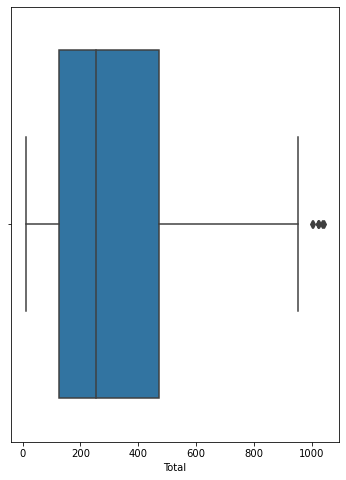

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

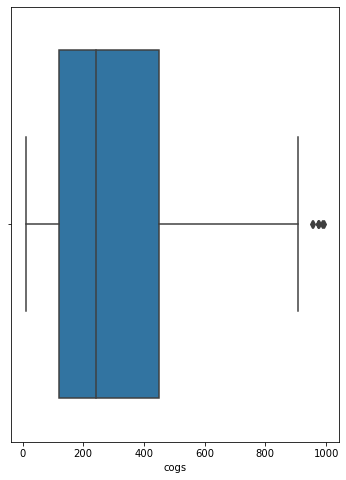

<Figure size 1440x576 with 0 Axes>

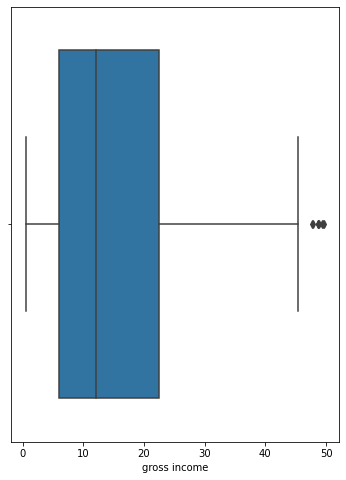

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

In [17]:
col=1 
for i in df.columns:
    plt.figure(figsize=(20,8))
    if (i=="Total") | (i=="cogs") | (i=="gross income"):
        plt.subplot(1,3,col);
        sns.boxplot(df[i]);
        plt.xlabel(i);
        col+=1

### Descriptive statistical summary of object data

In [18]:
df.describe(include="object")

,Branch,Customer type,Gender,Product line,Payment,Days,Month
count,1000,1000,1000,1000,1000,1000,1000
unique,3,2,2,6,3,7,3
top,A,Member,Female,Fashion accessories,Ewallet,Saturday,January
freq,340,501,501,178,345,164,352


## Step 3: checking correlation

In [19]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,weekday
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,-0.007040
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,0.054770
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.013879
weekday,-0.007040,0.054770,0.038809,0.038809,0.038809,NaN,0.038809,-0.013879,1.000000


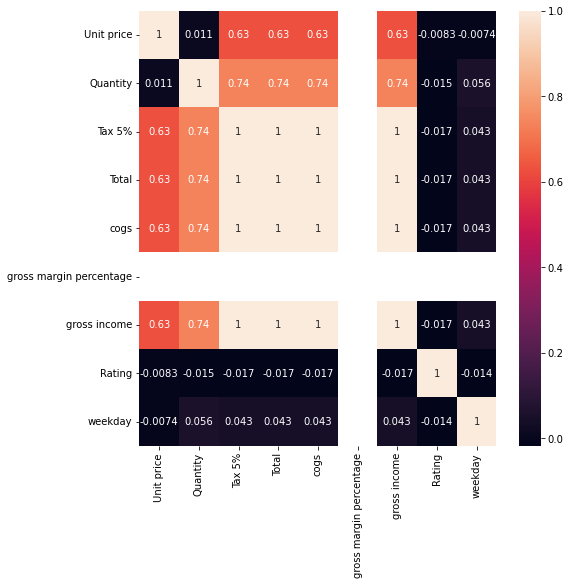

In [20]:
plt.figure(figsize=(8,8))
cor=df.corr(method="spearman")
sns.heatmap(cor,annot=True);

- Tax, Total, cogs and gross income are correlated

In [21]:
## gross margion %=(revenue -  cost of good sold)/revenue*100
gross_Margin=(df['Total']- df['cogs'])/df['Total']*(100)
gross_Margin  ## means profit %


0      4.761905
1      4.761905
2      4.761905
3      4.761905
4      4.761905
         ...   
995    4.761905
996    4.761905
997    4.761905
998    4.761905
999    4.761905
Length: 1000, dtype: float64

## add hour for better analysis

In [22]:
df["Time"]=pd.to_datetime(df["Time"])
df["Hour"]=df["Time"].dt.hour
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,weekday,Hour
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-03-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5,13
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-03-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,4,10
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-03-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,6,13
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-03-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,6,20
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-03-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,4,10


### Step 4 : insights
### Checking total sale and total gross income of tha company.

In [23]:
print("total sale -----",df["Total"].sum())

total sale ----- 322966.749


In [24]:
print("gross_income-----",df["gross income"].sum())

gross_income----- 15379.368999999999


- The total sale of supermarket company of all the three months is $ 322966.749

- find out the total sales and gross income of each branches-

### Find total sale and gross income of each branch.

In [25]:
df.groupby("Branch")["Total"].agg(["sum","mean","min","max"])

,sum,mean,min,max
Branch,,,,
A,106200.3705,312.354031,12.6945,1039.29
B,106197.6720,319.872506,18.6375,1022.49
C,110568.7065,337.099715,10.6785,1042.65


- Total Highest sale was recorded on Branch C on the basis of Total

- Total Lowest sale was recorded on Branch B on the basis of Total

### At which date and month highest sale recorded in branch c

In [26]:
print(" tha highest sale was of amount :",df["Total"].max())
df[(df["Total"]==df["Total"].max()) & (df["Branch"]=="C")][["Month","Date"]]



 tha highest sale was of amount : 1042.65


,Month,Date
350,February,2019-02-15


In [27]:
df_c=df[df["Branch"]=="C"]
df_c[df_c["Total"]==df_c["Total"].max()]["Date"]

350   2019-02-15
Name: Date, dtype: datetime64[ns]

### What was categoery of costumer and  its corresponding product category.

In [28]:
df_c[df_c["Total"]==df_c["Total"].max()][["Branch","Date","Product line","Customer type"]]

,Branch,Date,Product line,Customer type
350,C,2019-02-15,Fashion accessories,Member


###  At which dateand month lowest sale had been done at branch c .

In [29]:
print("the lowest sale was of amount :", df["Total"].min())
df_c=df[df["Branch"]=="C"]
df_c[df_c["Total"]==df_c["Total"].min()]["Date"]

the lowest sale was of amount : 10.6785


822   2019-02-07
Name: Date, dtype: datetime64[ns]

### What was categoery of costumer and  its corresponding product category.

In [30]:
df_c[df_c["Total"]==df_c["Total"].min()][["Branch","Date","Product line","Customer type"]]

,Branch,Date,Product line,Customer type
822,C,2019-02-07,Sports and travel,Member


### Find correlation b\w total sale and gross income

<AxesSubplot:>

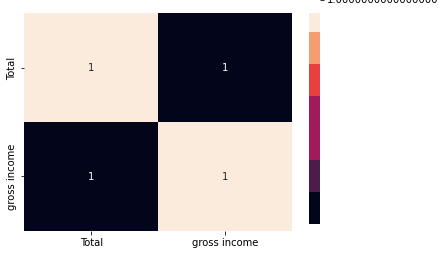

In [31]:
x1=df[["Total","gross income"]].corr()
sns.heatmap(x1,annot=True)


###  Find out the hot selling month(in plot)

In [32]:
df.groupby(["Branch","Month"])["Total"].agg(["max","sum","min","mean"]).sort_values(by="mean",ascending=True)

max         sum      min        mean
Branch Month                                              
A      March      951.825  37659.1215  16.2750  296.528516
B      March     1022.490  34597.3425  26.7225  308.904844
       February   853.146  34424.2710  30.9960  315.819000
A      February  1039.290  29860.1205  19.2465  317.660856
       January    931.035  38681.1285  12.6945  325.051500
C      February  1042.650  32934.9825  10.6785  329.349825
       January   1034.460  40434.6810  13.4190  331.431811
B      January   1022.385  37176.0585  18.6375  334.919446
C      March      943.299  37199.0430  17.0940  350.934368

C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


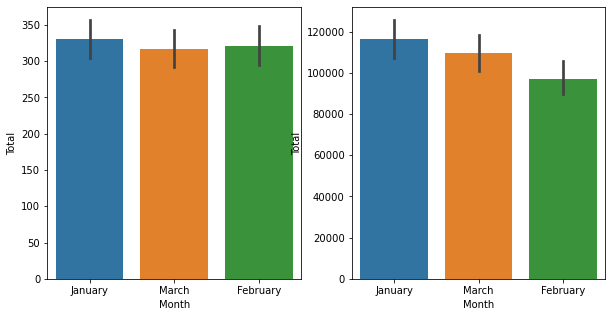

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(df["Month"],df["Total"],data=df)
plt.subplot(1,2,2)
sns.barplot(df["Month"],df["Total"],data=df,estimator=sum);

#### Insights: based on sum and average peak season month  is january

### Find out the hot selling month corresponding to  each branch (in plot)

In [34]:
print(df.groupby(["Month","Branch"])
      ["Total"].agg(["max","sum","min","mean"]).sort_values(by="mean",ascending=False))

                      max         sum      min        mean
Month    Branch                                           
March    C        943.299  37199.0430  17.0940  350.934368
January  B       1022.385  37176.0585  18.6375  334.919446
         C       1034.460  40434.6810  13.4190  331.431811
February C       1042.650  32934.9825  10.6785  329.349825
January  A        931.035  38681.1285  12.6945  325.051500
February A       1039.290  29860.1205  19.2465  317.660856
         B        853.146  34424.2710  30.9960  315.819000
March    B       1022.490  34597.3425  26.7225  308.904844
         A        951.825  37659.1215  16.2750  296.528516


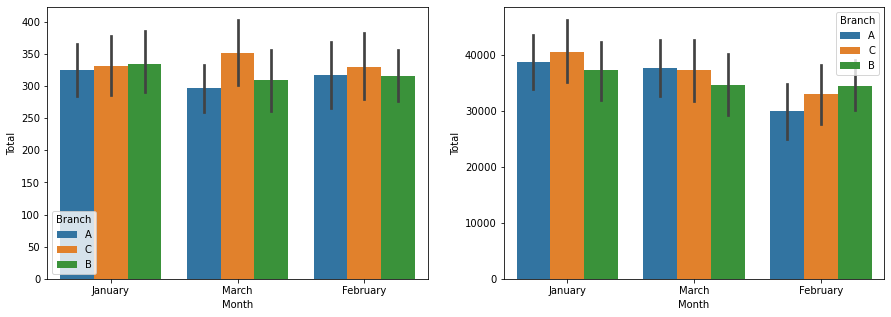

In [119]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x="Month",y="Total",data=df,hue="Branch")
plt.subplot(1,2,2)
sns.barplot(x="Month",y="Total",data=df,hue="Branch",estimator=sum);


- For Branch A, January was the hot selling month on the basis of mean

- For Branch B, January was the hot selling month on the basis of mean

- For Branch C, March was the hot selling month on the basis of mean



### Find the total weekdays sale and weekend sale

In [36]:
df["weekday"].unique()

array([5, 4, 6, 0, 3, 2, 1], dtype=int64)

In [37]:
week_day=df[df["weekday"]<=4]
weekend=df[df["weekday"]>4]
print("weekdays sale---",week_day["Total"].sum())
print("weekends sale---",weekend["Total"].sum())

weekdays sale--- 222388.04700000002
weekends sale--- 100578.702


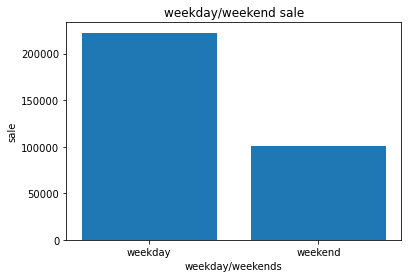

In [38]:
l1=[week_day["Total"].sum(),weekend["Total"].sum()]
l2=["weekday","weekend"]
plt.bar(l2,l1)
plt.title("weekday/weekend sale")
plt.xlabel("weekday/weekends")
plt.ylabel("sale")
plt.show();

### Find week days and weekend sale of all branches

In [39]:
week_day=df[df["weekday"]<=4]
weekend=df[df["weekday"]>4]
print("weekdays sale of all branches--",week_day.groupby(["Branch"])["Total"].sum())
print("weekends sale of all branches ---",weekend.groupby(["Branch"])["Total"].sum())

weekdays sale of all branches-- Branch
A    72428.139
B    74497.920
C    75461.988
Name: Total, dtype: float64
weekends sale of all branches --- Branch
A    33772.2315
B    31699.7520
C    35106.7185
Name: Total, dtype: float64


####  insight: weekday sale at branch C was highest

###  Find  weekend and weekdays sale of each month of all branches

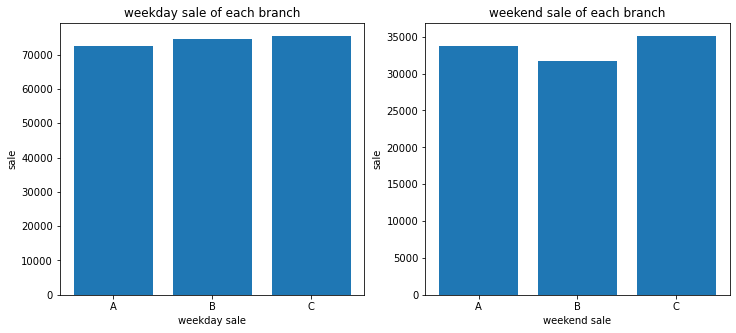

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(week_day.groupby(["Branch"])["Total"].sum().index,week_day.groupby(["Branch"])["Total"].sum().values)
plt.title("weekday sale of each branch")
plt.xlabel("weekday sale")
plt.ylabel("sale")
plt.subplot(1,2,2)
plt.bar(weekend.groupby(["Branch"])["Total"].sum().index,weekend.groupby(["Branch"])["Total"].sum().values)
plt.title("weekend sale of each branch")
plt.xlabel("weekend sale")
plt.ylabel("sale")
plt.show();

- weekday and weekend sale at Branch C was the highest_ 

### Find weekend and weekdays sale of each month for branch A.

In [41]:
print("sale trend at Branch A\n")
a=df[(df["Branch"]=="A")]
week_a=a[a["weekday"]<5]
weekend_a=a[a["weekday"]>=5]
print("sale on week days in each month ",week_a.groupby(["Month"])["Total"].sum())
print("sale on weekend days in each month ",weekend_a.groupby(["Month"])["Total"].sum())

sale trend at Branch A

sale on week days in each month  Month
February    20417.2395
January     25736.4870
March       26274.4125
Name: Total, dtype: float64
sale on weekend days in each month  Month
February     9442.8810
January     12944.6415
March       11384.7090
Name: Total, dtype: float64


###  Insights 
- weekdays sale is greater than weekends

### Find hot selling day and plot also

In [42]:
days=df.groupby(['Days'])['Total'].agg([sum]).reset_index().sort_values(by="sum",ascending=False)
days

,Days,sum
2,Saturday,56120.8095
5,Tuesday,51482.2455
4,Thursday,45349.2480
3,Sunday,44457.8925
0,Friday,43926.3405
6,Wednesday,43731.1350
1,Monday,37899.0780


C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


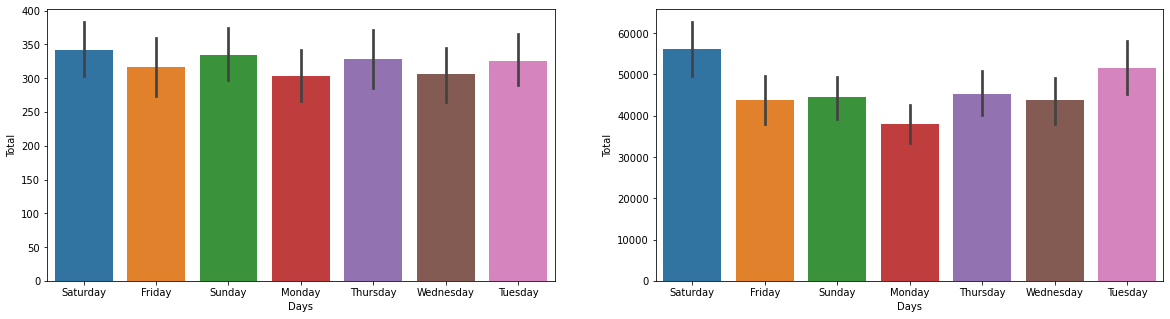

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(df["Days"],df["Total"],data=df)
plt.subplot(1,2,2)
sns.barplot(df["Days"],df["Total"],data=df,estimator=sum);

#### Saturday was the hot selling day on the basis of sum and mean

### Find hot selling day of each branch

In [44]:
df.groupby(["Branch","Days"])["Total"].agg(["max","sum","min","mean"]).sort_values(by="mean",ascending=False)

max         sum      min        mean
Branch Days                                                 
C      Friday     1042.6500  14964.7155  16.2015  393.808303
       Sunday      939.5400  17035.7460  23.7510  370.342304
B      Thursday    867.0900  15778.6230  33.9360  358.605068
       Tuesday    1022.3850  18859.2390  33.3585  355.834698
C      Wednesday  1034.4600  17755.8150  23.4990  355.116300
B      Saturday   1022.4900  21284.4240  28.4235  354.740400
A      Saturday    931.0350  16765.4130  12.6945  335.308260
       Thursday    921.1860  15422.2740  30.4080  335.266826
C      Saturday   1023.7500  18070.9725  17.0940  334.647639
       Tuesday     937.8180  17667.7935  13.4190  327.181361
A      Sunday      926.9505  17006.8185  16.1070  327.054202
B      Monday      832.9440  12734.7045  18.6375  326.530885
A      Wednesday   887.9220  13267.7265  32.1405  308.551779
B      Sunday      793.7160  10415.3280  26.7225  297.580800
A      Monday      649.2990  14239.0605  49.7700  296.647094
C      Thursday    829.0800  14148.3510  10.6785  294.757313
A      Tuesday     932.3370  14955.2130  16.2750  293.239471
       Friday     1039.2900  14543.8650  19.1940  290.877300
C      Monday      936.6000  10925.3130  14.6790  287.508237
B      Friday      922.6350  14417.7600  35.1960  282.701176
       Wednesday   666.9390  12707.5935  35.3115  254.151870

C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


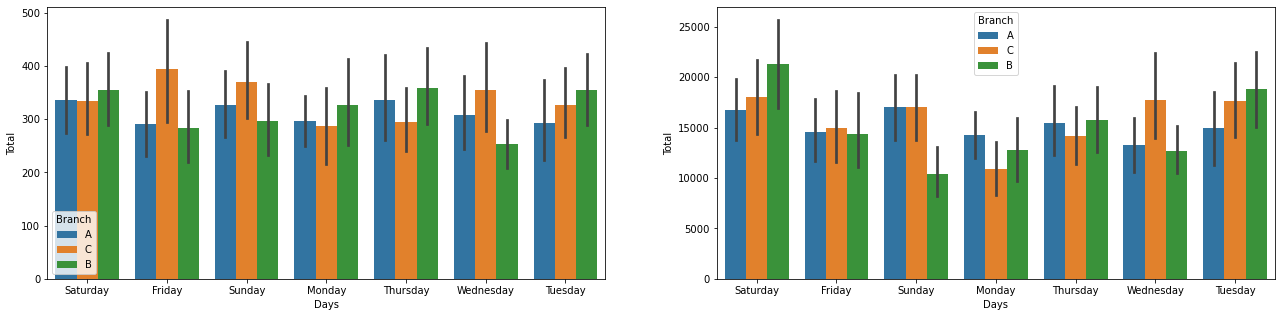

In [45]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.barplot(df["Days"],df["Total"],data=df,hue=df["Branch"])
plt.subplot(1,2,2)
sns.barplot(df["Days"],df["Total"],data=df,hue=df["Branch"],estimator=sum);

- Saturday was the hot selling day of Branch A on the basis of sum and total
- friday was the hot selling day of Branch C on the basis of sum and total
- Tuesday and Saturday was the hot selling day of Branch B on the basis of sum and total

### Find weekday sale and weekend sale of each branch in each month

In [46]:
week_day=df[df["weekday"]<=4]
weekend=df[df["weekday"]>4]
print("weekdays sale of all branches--",week_day.groupby(["Branch","Month"])["Total"].sum())
print("weekends sale of all branches ---",weekend.groupby(["Branch","Month"])["Total"].sum())

weekdays sale of all branches-- Branch  Month   
A       February    20417.2395
        January     25736.4870
        March       26274.4125
B       February    25964.4525
        January     27634.8870
        March       20898.5805
C       February    21950.5020
        January     30470.0550
        March       23041.4310
Name: Total, dtype: float64
weekends sale of all branches --- Branch  Month   
A       February     9442.8810
        January     12944.6415
        March       11384.7090
B       February     8459.8185
        January      9541.1715
        March       13698.7620
C       February    10984.4805
        January      9964.6260
        March       14157.6120
Name: Total, dtype: float64


C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


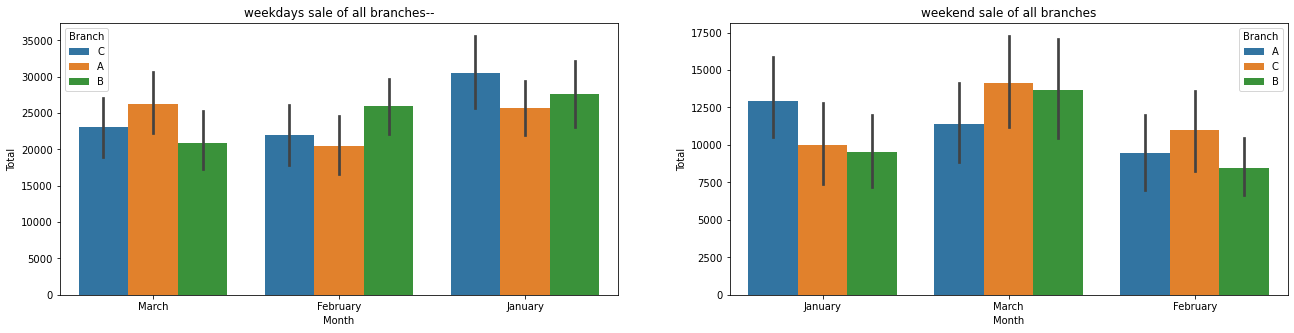

In [47]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.barplot(week_day["Month"],week_day["Total"],data=week_day,hue=week_day["Branch"],estimator=sum)
plt.title("weekdays sale of all branches--")
plt.subplot(1,2,2)
sns.barplot(weekend["Month"],weekend["Total"],data=weekend,hue=weekend["Branch"],estimator=sum)
plt.title("weekend sale of all branches");

### Find weekday sale and weekend sale of branch A

In [48]:
print("sale trend at branch A ")
a=df[(df["Branch"]=="A")]
week_day_a=a[a["weekday"]<=4]
weekend_a=a[a["weekday"]>4]
print("weekdays sale of branch A in each month--",week_day_a.groupby(["Branch","Month"])["Total"].sum())
print("weekends sale of branch A in each month ---",weekend_a.groupby(["Branch","Month"])["Total"].sum())

sale trend at branch A 
weekdays sale of branch A in each month-- Branch  Month   
A       February    20417.2395
        January     25736.4870
        March       26274.4125
Name: Total, dtype: float64
weekends sale of branch A in each month --- Branch  Month   
A       February     9442.8810
        January     12944.6415
        March       11384.7090
Name: Total, dtype: float64


C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'weekend sale of Branch A')

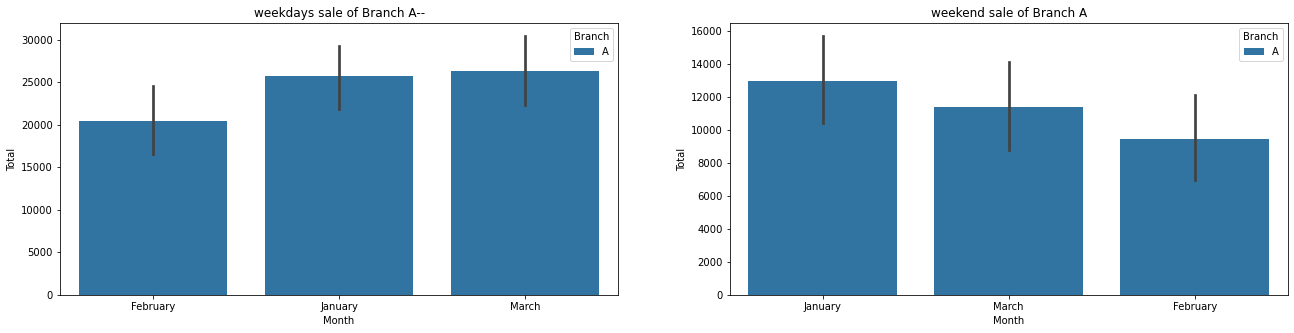

In [49]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.barplot(week_day_a["Month"],week_day_a["Total"],data=week_day_a,hue=week_day_a["Branch"],estimator=sum)
plt.title("weekdays sale of Branch A--")
plt.subplot(1,2,2)
sns.barplot(weekend_a["Month"],weekend_a["Total"],data=weekend_a,hue=weekend_a["Branch"],estimator=sum)
plt.title("weekend sale of Branch A")

### Find weekday sale and weekend sale of branch B

In [50]:
print("sale trend at branch B ")
b=df[(df["Branch"]=="B")]
week_day_b=b[b["weekday"]<=4]
weekend_b=b[b["weekday"]>4]
print("weekdays sale of branch B in each month--",week_day_b.groupby(["Branch","Month"])["Total"].sum())
print("weekends sale of branch B in each month ---",weekend_b.groupby(["Branch","Month"])["Total"].sum())

sale trend at branch B 
weekdays sale of branch B in each month-- Branch  Month   
B       February    25964.4525
        January     27634.8870
        March       20898.5805
Name: Total, dtype: float64
weekends sale of branch B in each month --- Branch  Month   
B       February     8459.8185
        January      9541.1715
        March       13698.7620
Name: Total, dtype: float64


C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


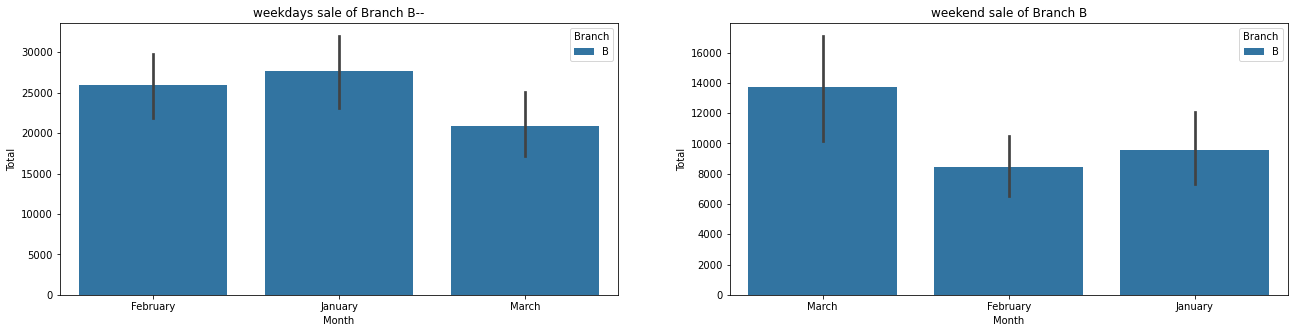

In [51]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.barplot(week_day_b["Month"],week_day_b["Total"],data=week_day_b,hue=week_day_b["Branch"],estimator=sum)
plt.title("weekdays sale of Branch B--")
plt.subplot(1,2,2)
sns.barplot(weekend_b["Month"],weekend_b["Total"],data=weekend_b,hue=weekend_b["Branch"],estimator=sum)
plt.title("weekend sale of Branch B");

### Find weekday sale and weekend sale of branch C

In [52]:
print("sale trend at branch C ")
c=df[(df["Branch"]=="C")]
week_day_c=c[c["weekday"]<=4]
weekend_c=c[c["weekday"]>4]
print("weekdays sale of branch C in each month--",week_day_c.groupby(["Branch","Month"])["Total"].sum())
print("weekends sale of branch C in each month ---",weekend_c.groupby(["Branch","Month"])["Total"].sum())

sale trend at branch C 
weekdays sale of branch C in each month-- Branch  Month   
C       February    21950.502
        January     30470.055
        March       23041.431
Name: Total, dtype: float64
weekends sale of branch C in each month --- Branch  Month   
C       February    10984.4805
        January      9964.6260
        March       14157.6120
Name: Total, dtype: float64


C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


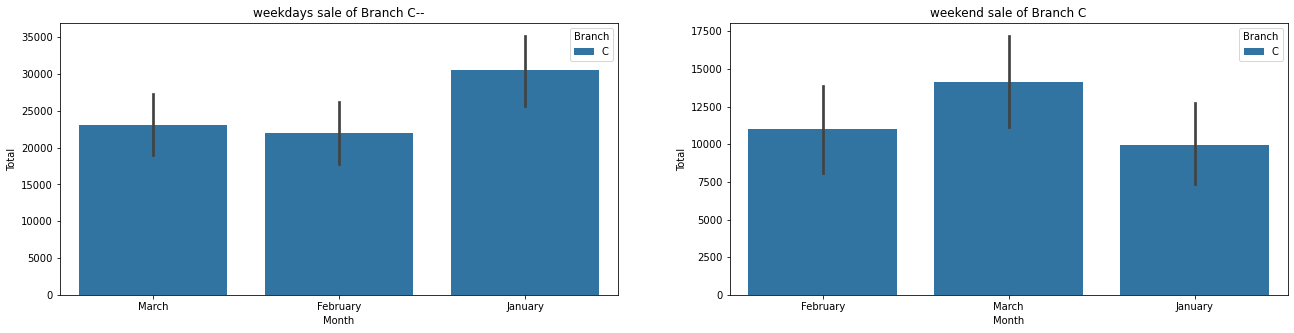

In [53]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.barplot(week_day_c["Month"],week_day_c["Total"],data=week_day_c,hue=week_day_c["Branch"],estimator=sum)
plt.title("weekdays sale of Branch C--")
plt.subplot(1,2,2)
sns.barplot(weekend_c["Month"],weekend_c["Total"],data=weekend_c,hue=weekend_c["Branch"],estimator=sum)
plt.title("weekend sale of Branch C");

### Customer visiting trend of each branch corresponding to each month

In [54]:
a=df[(df["Branch"] =="A")]
a.head(2)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,weekday,Hour
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-03-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5,13
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-03-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,6,13


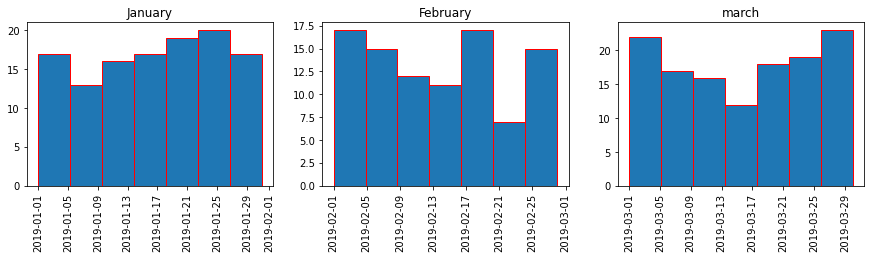

In [55]:
plt.figure(figsize = (15,3))
a=df[(df["Branch"] =="A")]
a_jan=a[a["Month"]=="January"]
plt.subplot(1,3,1)
plt.hist(a_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
a_feb=a[a["Month"]=="February"]
plt.subplot(1,3,2)
plt.hist(a_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("February")
a_march=a[a["Month"]=="March"]
plt.subplot(1,3,3)
plt.hist(a_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("march")
plt.show()

### Insights of Branch A
- january : max customer visited on 23-27 and min visited on 05-09
- feburary : max customer visited on 16-20 and min visited on 20-24
- march : max customer visited on 24-29 and min visited on 13-17

### For Branch B¶

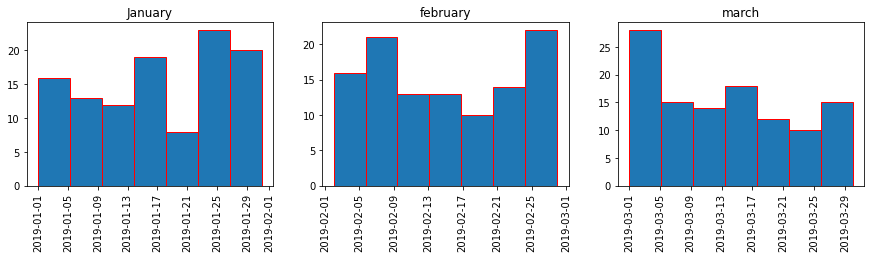

In [56]:
plt.figure(figsize = (15,3))
b=df[(df["Branch"] =="B")]
b_jan=b[b["Month"]=="January"]
plt.subplot(1,3,1)
plt.hist(b_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
b_feb=b[b["Month"]=="February"]
plt.subplot(1,3,2)
plt.hist(b_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("february")
b_march=b[b["Month"]=="March"]
plt.subplot(1,3,3)
plt.hist(b_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("march")
plt.show()

### Insights of Branch B
- january : max customer visited on 23-27 and min visited on 18-22
- feburary : max customer visited on 24-28 and min visited on 17-21
- march : max customer visited on 01-05 and min visited on 22-26

### For branch C

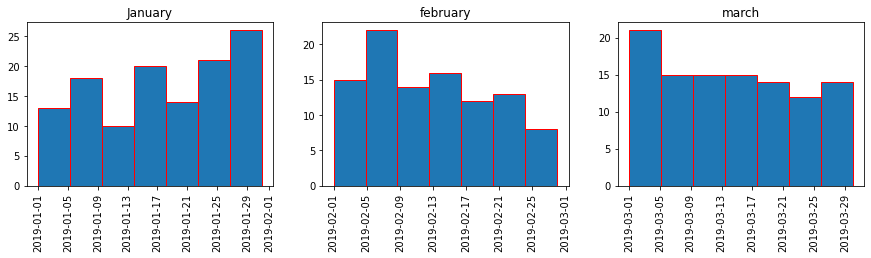

In [57]:
plt.figure(figsize = (15,3))
c=df[(df["Branch"] =="C")]
c_jan=c[c["Month"]=="January"]
plt.subplot(1,3,1)
plt.hist(c_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
c_feb=c[c["Month"]=="February"]
plt.subplot(1,3,2)
plt.hist(c_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("february")
c_march=c[c["Month"]=="March"]
plt.subplot(1,3,3)
plt.hist(c_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("march")
plt.show()

### Insights of Branch C¶
- jan : max customer visited on 23-27 and min visited on 09-13
- feb : max customer visited on 05-09 and min visited on 24-28
- mar : max customer visited on 01-05 and min visited on 22-26


## Product and Sale¶

###  Find Most populated product of the company 

In [58]:
df["Product line"].mode()

0    Fashion accessories
Name: Product line, dtype: object

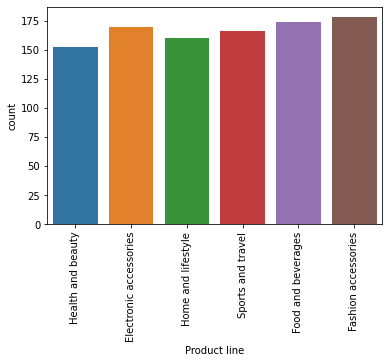

In [59]:
sns.countplot(x="Product line",data=df)
plt.xticks(rotation=90);

### For distribution check pie chart

In [60]:
p_index=df['Product line'].value_counts().index
p_index

Index(['Fashion accessories', 'Food and beverages', 'Electronic accessories',
       'Sports and travel', 'Home and lifestyle', 'Health and beauty'],
      dtype='object')

In [61]:
p_values=c['Product line'].value_counts().values
p_values

array([66, 65, 55, 52, 45, 45], dtype=int64)

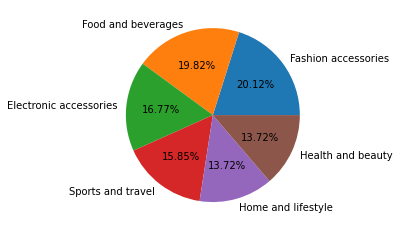

In [62]:
plt.pie(p_values,labels=p_index,autopct='%.2f%%')
plt.show()

### Find tha product taste trends of costumer for each branch or produnct demands of each branch

In [63]:
df.groupby(["Branch"])["Product line"].value_counts()

Branch  Product line          
A       Home and lifestyle        65
        Electronic accessories    60
        Sports and travel         59
        Food and beverages        58
        Fashion accessories       51
        Health and beauty         47
B       Fashion accessories       62
        Sports and travel         62
        Electronic accessories    55
        Health and beauty         53
        Food and beverages        50
        Home and lifestyle        50
C       Food and beverages        66
        Fashion accessories       65
        Electronic accessories    55
        Health and beauty         52
        Home and lifestyle        45
        Sports and travel         45
Name: Product line, dtype: int64

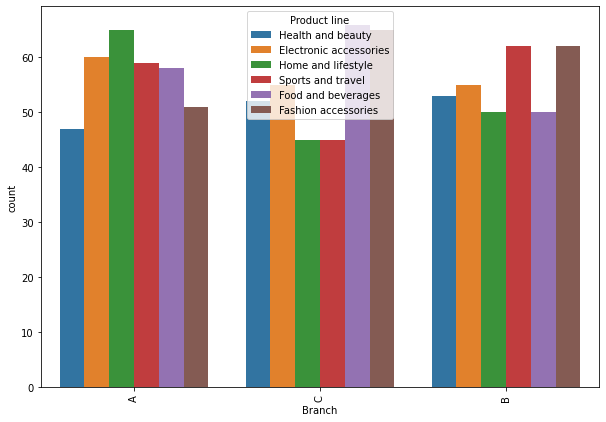

In [64]:
plt.figure(figsize=(10,7))
sns.countplot(x="Branch",data=df,hue="Product line");
plt.xticks(rotation=90);

- At branch A, customer demanded for Home and Lifestyle product the most.
- At branch B, customer demanded for Fashion accessories and Sports and travel products the most.
- At branch C, customer demanded for Food and Beverages product the most.

### Find out tha sale of product

In [65]:
a=df.groupby(["Product line"])["Total"].sum()
a

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

### Visual representation

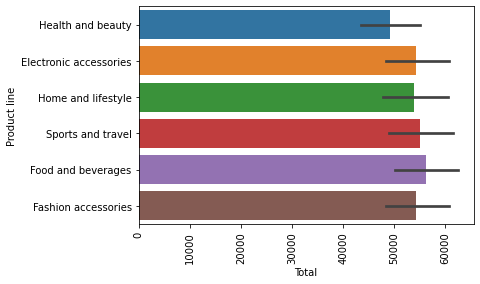

In [66]:
sns.barplot(x="Total",y="Product line",data=df,estimator=sum,orient="h")
plt.xticks(rotation=90)
plt.show()

### insights
- sale of food and beverages is highest

### Find product wise sale trend of each branch

In [67]:
df.groupby(["Branch","Product line"])["Total"].sum().sort_values(ascending=False)         

Branch  Product line          
C       Food and beverages        23766.8550
A       Home and lifestyle        22417.1955
C       Fashion accessories       21560.0700
B       Sports and travel         19988.1990
        Health and beauty         19980.6600
A       Sports and travel         19372.6995
C       Electronic accessories    18968.9745
A       Electronic accessories    18317.1135
B       Home and lifestyle        17549.1645
A       Food and beverages        17163.1005
B       Electronic accessories    17051.4435
C       Health and beauty         16615.3260
B       Fashion accessories       16413.3165
A       Fashion accessories       16332.5085
C       Sports and travel         15761.9280
B       Food and beverages        15214.8885
C       Home and lifestyle        13895.5530
A       Health and beauty         12597.7530
Name: Total, dtype: float64

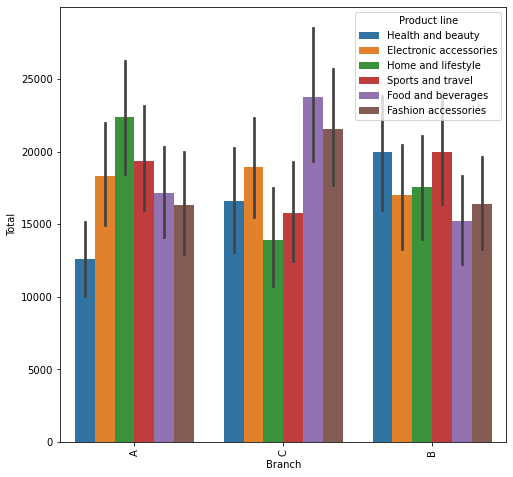

In [68]:
plt.figure(figsize=(8,8))
sns.barplot(x="Branch",y="Total",hue="Product line",data=df,estimator=sum)
plt.xticks(rotation=90);


### Find tha month wise sale of each product

In [69]:
df.groupby(["Product line","Month"])["Total"].sum()

Product line            Month   
Electronic accessories  February    17362.9050
                        January     18831.2880
                        March       18143.3385
Fashion accessories     February    19009.8615
                        January     19345.1160
                        March       15950.9175
Food and beverages      February    20000.3580
                        January     19570.5300
                        March       16573.9560
Health and beauty       February    14602.2555
                        January     16383.1710
                        March       18208.3125
Home and lifestyle      February    12434.3835
                        January     20494.7400
                        March       20932.7895
Sports and travel       February    13809.6105
                        January     21667.0230
                        March       19646.1930
Name: Total, dtype: float64

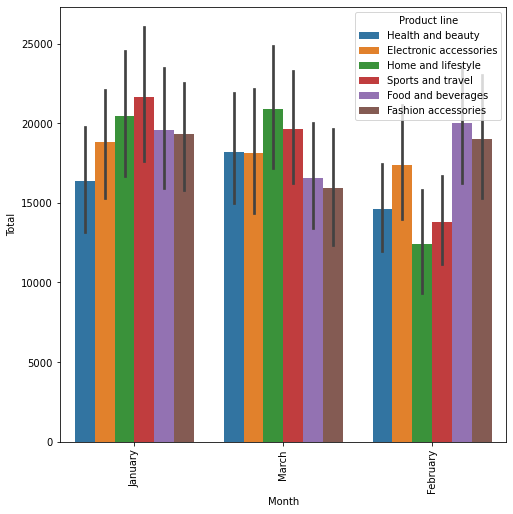

In [70]:
plt.figure(figsize=(8,8))
sns.barplot(x="Month",y="Total",hue="Product line",data=df,estimator=sum)
plt.xticks(rotation=90);

## Find tha total number of costumer

In [71]:
df["Gender"].count()
df["Gender"].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

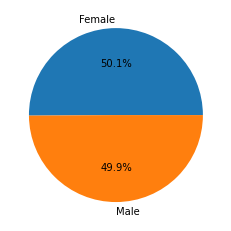

In [72]:
plt.pie(df["Gender"].value_counts(),labels=df["Gender"].unique(),autopct="%0.01f%%");

### Find tha costumers product taste according to tha Gender

In [73]:
df.groupby(["Product line"])["Gender"].value_counts()

Product line            Gender
Electronic accessories  Male      86
                        Female    84
Fashion accessories     Female    96
                        Male      82
Food and beverages      Female    90
                        Male      84
Health and beauty       Male      88
                        Female    64
Home and lifestyle      Male      81
                        Female    79
Sports and travel       Female    88
                        Male      78
Name: Gender, dtype: int64

C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


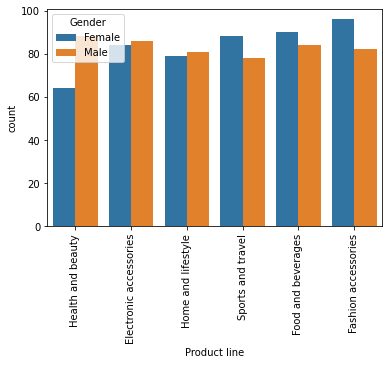

In [74]:
sns.countplot(df["Product line"],hue=df["Gender"]);
plt.xticks(rotation=90);

## find tha who contributed most male/female

In [75]:
df.groupby(["Gender"])["Total"].sum()

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

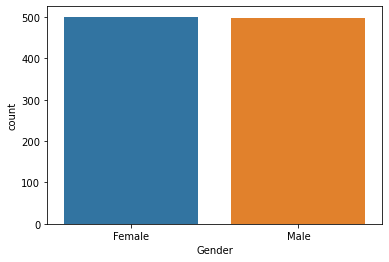

In [76]:
sns.countplot(df["Gender"])

Branch wise

In [77]:
df.groupby(["Branch","Product line"])["Gender"].value_counts()

Branch  Product line            Gender
A       Electronic accessories  Male      32
                                Female    28
        Fashion accessories     Female    28
                                Male      23
        Food and beverages      Male      35
                                Female    23
        Health and beauty       Male      26
                                Female    21
        Home and lifestyle      Male      33
                                Female    32
        Sports and travel       Male      30
                                Female    29
B       Electronic accessories  Female    28
                                Male      27
        Fashion accessories     Female    33
                                Male      29
        Food and beverages      Female    29
                                Male      21
        Health and beauty       Male      33
                                Female    20
        Home and lifestyle      Male      28
                

In [78]:
who contributed most? male/female

No variables match your requested type.


In [79]:
df.groupby(["Gender"])["Total"].agg(["sum","mean"])


,sum,mean
Gender,,
Female,167882.925,335.095659
Male,155083.824,310.789226


## Find tha total sale by each gender

<AxesSubplot:xlabel='Gender', ylabel='Total'>

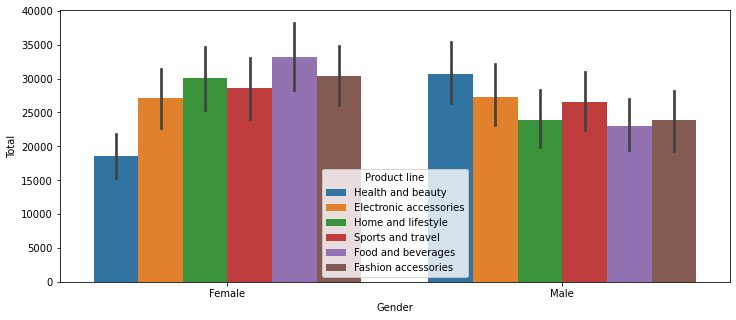

In [80]:
plt.figure(figsize=(12,5))
sns.barplot(x="Gender",y="Total",data=df,hue="Product line",estimator=sum)

## Which branch has highest costumer

In [81]:
df.groupby(["Branch"])["Customer type"].count()

Branch
A    340
B    332
C    328
Name: Customer type, dtype: int64

### How many Customers were normal or Member of the company?¶

In [82]:
df.groupby(["Customer type"])["Total"].sum()

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

### Find Customers type count of each branch

In [83]:
df.groupby(["Branch"])["Customer type"].value_counts()

Branch  Customer type
A       Normal           173
        Member           167
B       Normal           167
        Member           165
C       Member           169
        Normal           159
Name: Customer type, dtype: int64

C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


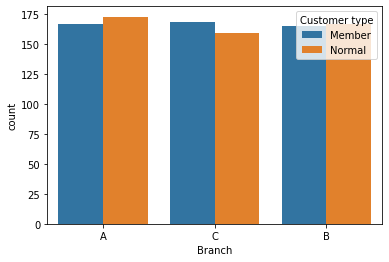

In [84]:
sns.countplot(df["Branch"],hue=df["Customer type"]);

### Find tha peak time of costumer visited at supermall

In [85]:
df["Time"].mode()

0   2023-03-25 14:42:00
1   2023-03-25 19:48:00
Name: Time, dtype: datetime64[ns]

In [86]:
df.groupby(["Branch"])["Time"].value_counts()

Branch  Time               
A       2023-03-25 11:51:00    3
        2023-03-25 12:43:00    3
        2023-03-25 13:34:00    3
        2023-03-25 15:48:00    3
        2023-03-25 19:44:00    3
                              ..
C       2023-03-25 20:47:00    1
        2023-03-25 20:50:00    1
        2023-03-25 20:51:00    1
        2023-03-25 20:54:00    1
        2023-03-25 20:59:00    1
Name: Time, Length: 788, dtype: int64

### can not analyse so we will make a hour column for better analyization
### add hour for better analysis

In [87]:
df["Time"]=pd.to_datetime(df["Time"])
df["Hour"]=df["Time"].dt.hour
df.head(4)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,weekday,Hour
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-03-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5,13
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-03-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,4,10
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-03-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,6,13
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-03-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,6,20


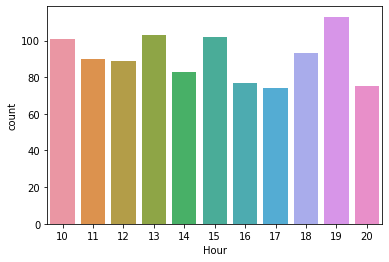

In [88]:
sns.countplot(x="Hour",data=df);

Text(0, 0.5, 'Quantity')

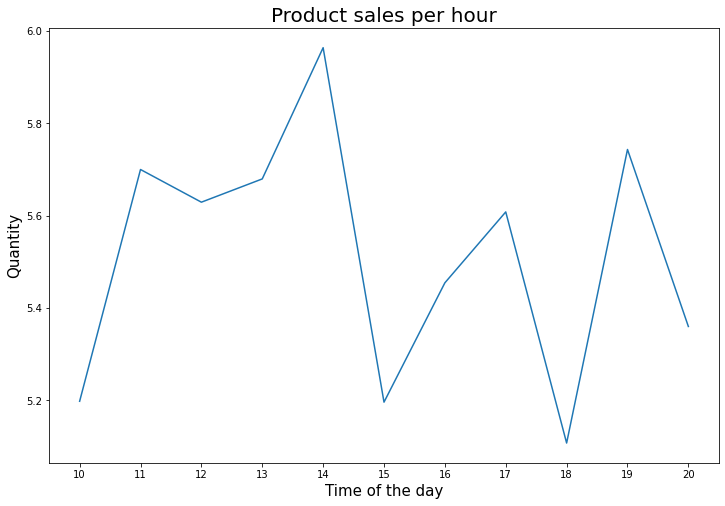

In [89]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Hour',y='Quantity',data=df,ci=None)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.xticks(df['Hour'].unique())
# plt.yticks(df['Quantity'].unique())
plt.ylabel('Quantity', fontsize=15)



### Find hot selling time of each item.

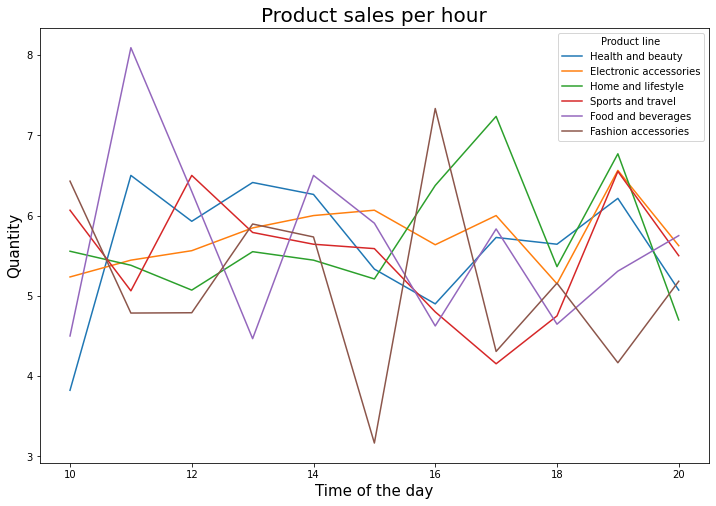

In [90]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Hour',y='Quantity',data=df,hue="Product line",ci=None)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Quantity',fontsize=15);

- food and beverages are seem to be purchased around 10-11 am
- fashion and accessiores are seem to be purchased around 4 pm, which can be an ideal time not only for adults but also for teenagers.
- home and lifestyle item recorded highest sale around 5 pm, which can be the ideal time for homemakers to make some purchases
- electronic sales are seen around 7 pm
- health and beauty : we cannot see high peak time for this product
Rating

### Rating

### Find highest ,lowest and average reating of tha company.

In [91]:
df["Rating"].agg(["max","min","mean"])

max     10.0000
min      4.0000
mean     6.9727
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Company min, max and avg rating')

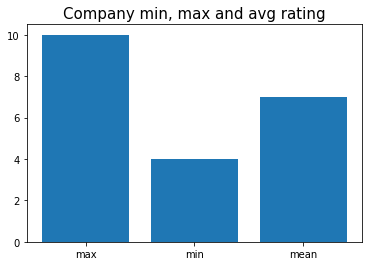

In [92]:
plt.bar(df["Rating"].agg(["max","min","mean"]).index,df["Rating"].agg(["max","min","mean"]).values)
plt.title('Company min, max and avg rating', fontsize=15)

### How many costumer had given  10 rating to tha company

In [93]:
print(len(df[df["Rating"]==10.00]),"costumer given 10 rating")
print(len(df[df["Rating"]==10.00])*100/df["Rating"].count(), " % costumers given 10 rating")

5 costumer given 10 rating
0.5  % costumers given 10 rating


In [94]:
len(df["Rating"].unique())

61

### find avg rating of customers
- make countplot of ratings- give bins

In [95]:
df.groupby(["Customer type"])["Rating"].mean()

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64

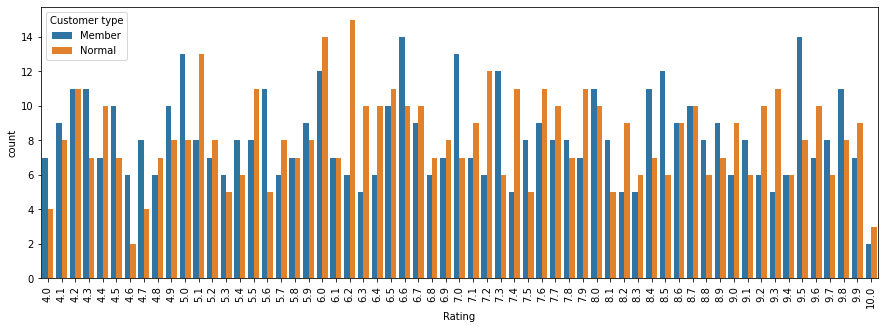

In [96]:
plt.figure(figsize=(15,5))
sns.countplot(x="Rating",data=df,hue="Customer type");
plt.xticks(rotation=90);


(array([102.,  93.,  89., 107., 108., 101., 105.,  99.,  91., 105.]),
 array([ 4. ,  4.6,  5.2,  5.8,  6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. ]),
 <BarContainer object of 10 artists>)

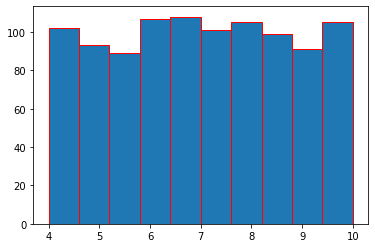

In [97]:
plt.hist(df["Rating"],edgecolor="red")

In [98]:
df["Rating"].value_counts()

6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

In [99]:
len(df[df["Rating"]>=9.0])

166

<AxesSubplot:xlabel='Rating', ylabel='count'>

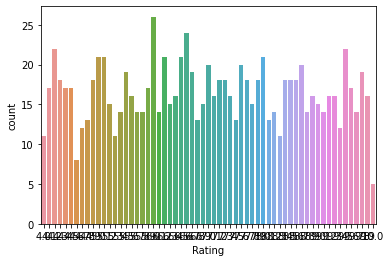

In [100]:
sns.countplot(x="Rating",data=df)

In [101]:
len(df[df["Rating"]>=9.0])

166

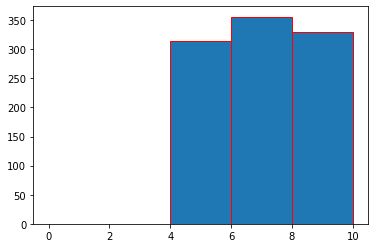

In [102]:
plt.hist(df["Rating"],edgecolor="red",bins=[0,2,4,6,8,10]);


### Find highest, lowest and average rating at each branch

In [103]:
x=df.groupby(["Branch"])["Rating"].agg(["max","mean","min"])
x.reset_index()

,Branch,max,mean,min
0,A,10.0,7.027059,4.0
1,B,10.0,6.818072,4.0
2,C,10.0,7.072866,4.0


- using subplot, make 3 subplots-branch ,max,min, mean
which product category is most liked by customer

In [104]:
df.groupby(["Product line"])["Rating"].agg(["max","min","mean"]).sort_values(by="mean")

,max,min,mean
Product line,,,
Home and lifestyle,9.9,4.1,6.837500
Sports and travel,10.0,4.0,6.916265
Electronic accessories,10.0,4.0,6.924706
Health and beauty,10.0,4.0,7.003289
Fashion accessories,9.9,4.0,7.029213
Food and beverages,9.9,4.0,7.113218


###  Find max min mean product wise rating of each banch.

In [105]:
x=df.groupby(["Branch","Product line"])["Rating"].agg(["max","mean","min"])
x

max      mean  min
Branch Product line                               
A      Electronic accessories   9.9  6.911667  4.3
       Fashion accessories      9.9  6.878431  4.0
       Food and beverages       9.9  7.253448  4.0
       Health and beauty       10.0  6.900000  4.2
       Home and lifestyle       9.9  6.930769  4.1
       Sports and travel        9.9  7.257627  4.1
B      Electronic accessories  10.0  7.116364  4.0
       Fashion accessories      9.9  6.722581  4.1
       Food and beverages       9.9  6.994000  4.0
       Health and beauty        9.9  7.100000  4.0
       Home and lifestyle       9.8  6.516000  4.1
       Sports and travel       10.0  6.509677  4.1
C      Electronic accessories   9.8  6.747273  4.1
       Fashion accessories      9.9  7.440000  4.0
       Food and beverages       9.9  7.080303  4.0
       Health and beauty        9.9  6.998077  4.1
       Home and lifestyle       9.8  7.060000  4.3
       Sports and travel       10.0  7.028889  4.0

## Payment¶

### Find tha number e-walet ,credit card and costumer paying costumer.

In [106]:
df.groupby(["Branch"])["Payment"].value_counts()

Branch  Payment    
A       Ewallet        126
        Cash           110
        Credit card    104
B       Ewallet        113
        Cash           110
        Credit card    109
C       Cash           124
        Ewallet        106
        Credit card     98
Name: Payment, dtype: int64

Text(0.5, 1.0, 'Payment Channel')

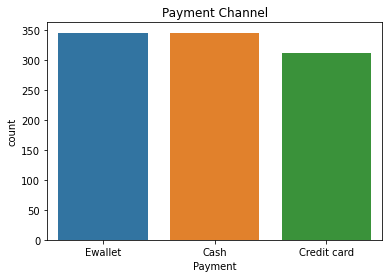

In [107]:
sns.countplot(x="Payment",data=df).set_title("Payment Channel") 

### Find the no of e-wallet, credit card and cash paying customers of each branch

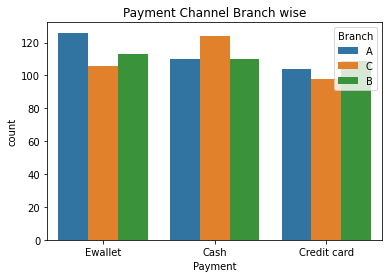

In [108]:
sns.countplot(x="Payment",data=df,hue="Branch").set_title("Payment Channel Branch wise"); 

### Which type of payment lead to more  sale

In [109]:
df.groupby(["Branch"])["Payment"].value_counts()

Branch  Payment    
A       Ewallet        126
        Cash           110
        Credit card    104
B       Ewallet        113
        Cash           110
        Credit card    109
C       Cash           124
        Ewallet        106
        Credit card     98
Name: Payment, dtype: int64

In [110]:
payment_lead=df.groupby(["Branch","Payment"])["Total"].sum().sort_values(ascending=False).reset_index()
payment_lead.head()

,Branch,Payment,Total
0,C,Cash,43085.8575
1,A,Ewallet,39324.3690
2,B,Credit card,37344.8565
3,C,Ewallet,37155.3840
4,B,Cash,35339.4615


C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


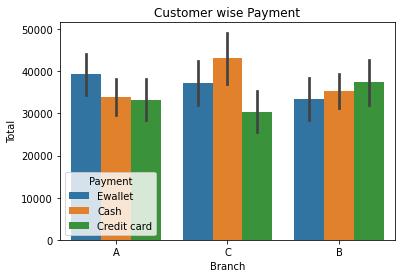

In [111]:
sns.barplot(df["Branch"],df["Total"],data=df,hue="Payment",estimator=sum).set_title("Customer wise Payment");

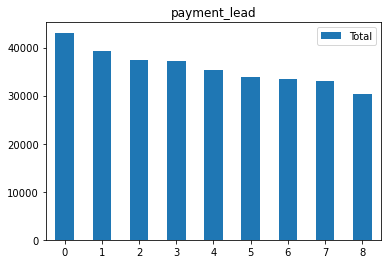

In [112]:
payment_lead.plot(kind="bar",title="payment_lead")
plt.xticks(rotation=360);

## What is the relationship between the date and time of a transaction and the total amount spent?



In [113]:
transaction_data=df.groupby(["Date","Time"])["Quantity"].sum()
transaction_data

Date        Time               
2019-01-01  2023-03-25 10:39:00     6
            2023-03-25 11:36:00    10
            2023-03-25 11:40:00     6
            2023-03-25 11:43:00     2
            2023-03-25 13:55:00     9
                                   ..
2019-03-30  2023-03-25 16:34:00     2
            2023-03-25 17:04:00     5
            2023-03-25 17:58:00     8
            2023-03-25 19:26:00     8
            2023-03-25 20:37:00     3
Name: Quantity, Length: 994, dtype: int64

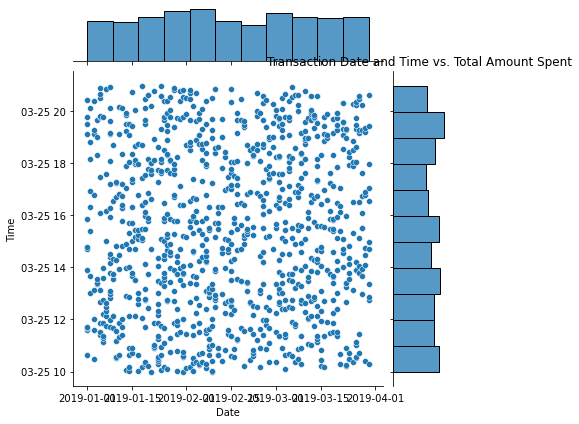

In [114]:
sns.jointplot(x='Date', y='Time', data=transaction_data, kind='scatter')
plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Transaction Date and Time vs. Total Amount Spent');

Top 10 groups with the highest average customer ratings:
Gender  Customer type  Payment      Product line          
Female  Member         Credit card  Electronic accessories    8.050000
Male    Normal         Credit card  Electronic accessories    7.925000
Female  Normal         Cash         Food and beverages        7.876923
Male    Member         Credit card  Electronic accessories    7.843750
                       Ewallet      Health and beauty         7.815385
Female  Normal         Cash         Health and beauty         7.738462
Male    Normal         Ewallet      Sports and travel         7.584211
Female  Member         Ewallet      Home and lifestyle        7.520000
                       Cash         Food and beverages        7.485000
        Normal         Cash         Fashion accessories       7.476471
Name: Rating, dtype: float64


<AxesSubplot:title={'center':'Top Groups With The Highest Average Customer Ratings'}, xlabel='Gender,Customer type,Payment,Product line'>

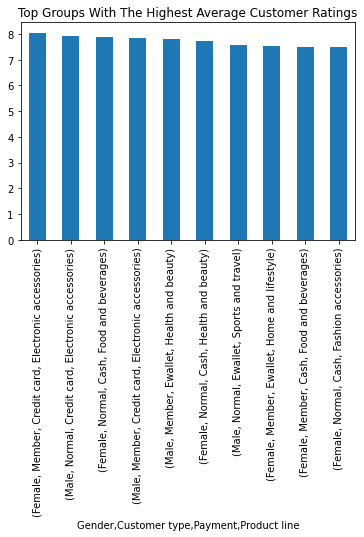

In [115]:
# group the data by gender, customer type, payment method, and product line and calculate the average customer rating for each group
customer_data = df.groupby(['Gender', 'Customer type', 'Payment', 'Product line'])['Rating'].mean()

# sort the groups by average customer rating in descending order
customer_data = customer_data.sort_values(ascending=False)

# print the top 10 groups with the highest average customer ratings
print('Top 10 groups with the highest average customer ratings:')
print(customer_data.head(10))

# visualize the top 10 groups with the highest average customer ratings
customer_data.head(10).plot(kind='bar', title = 'Top Groups With The Highest Average Customer Ratings')